<a href="https://colab.research.google.com/github/Maureen36Mathenge/Determinants-of-House-prices-/blob/master/Moringa_IP_Week_7_Maureen_Mathenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Understanding 

**Objectives**
1. Increase the sales for the houses hence improving profits 
2. Know the target customers for certain houses characteristcs

#Metric of Success



#Import Libraries

In [0]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from matplotlib import pyplot as plt
import seaborn as sns
 
 #Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy as sp
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge
import statsmodels.formula.api as smf


#Upload the dataset 

In [2]:
df =  pd.read_csv("http://bit.ly/IndependentProjectWeek7Dataset")
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [3]:
df.condition.unique()

array([3, 5, 4, 1, 2])

In [4]:
#Let figure the number of columns we are working with 
df.shape

(21613, 20)

We have 21613 rows and 20 columns

In [5]:
#Get the data types for all the columns
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#Data Cleaning 
For the sake of modelling and just ethical principles of working we clean data,we shall take several steps to check how clean or data is


##1.Validity

In [0]:
#create a function that can pass any dataframe
def plot_boxplots(target_dataframe,col_names):
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)
    plt.show()

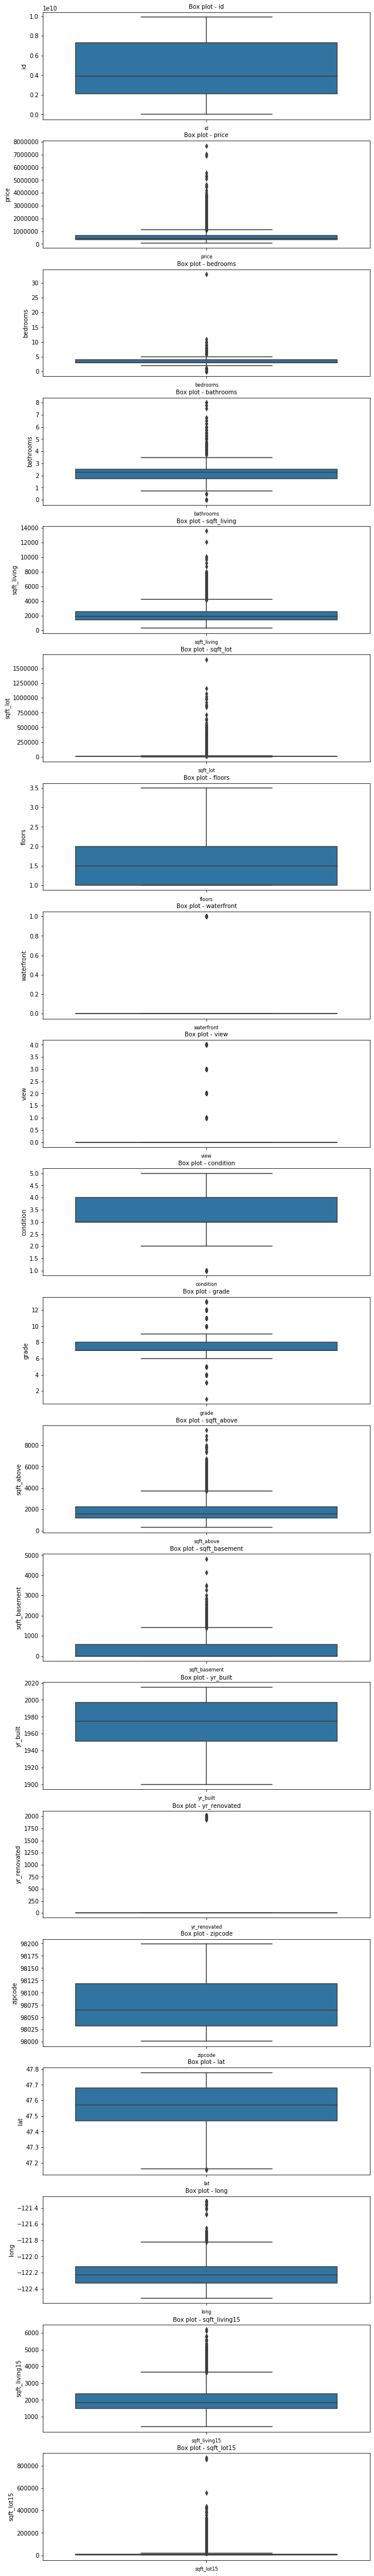

In [7]:
#Execute the function
col_names = df.columns
target_dataframe = df
plot_boxplots(target_dataframe,col_names)

There are a number of outliers in the dataset.

This is due to a number of factors.
For the prices,they could be high due to their locationn as well as the amenities it has. 
We also see that some amenities are not likely to be found in many houses eg the Waterfront.
It's expected that houses with this amenity are expensive as well.

Since the company's aim is to get profit,we also expect they shall maximize the spaces available to them.
Therefore ,houses that take up more spaces,are more expensive.
This is because the land cost is very high due to certain factors. 

##2.Completeness

In [8]:
 df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The dataset is complete

##3.Consistency

In [9]:
df.duplicated().sum()

3

From the dataset we have 3 duplicates
We shall go with the option of dropping them  

In [10]:
df = df.drop_duplicates()
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


#Exploratory Data Analysis



##Univariate Analysis
##Measure of central tendency

This will give us more insights on our dataset 

In [11]:
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
df.shape

(21610, 20)

In [13]:
#Get insights on the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21610.000,21610.000,21610.000,21610.000,21610.000,21610.000,21610.000,21610.000,21610.000,21610.000,21610.000,21610.000,21610.000,21610.000,21610.000,21610.000,21610.000,21610.000,21610.000,21610.000
mean,4580160795.988,540178.945,3.371,2.115,2079.881,15108.290,1.494,0.008,0.234,3.409,7.657,1788.348,291.533,1971.004,84.322,98077.946,47.560,-122.214,1986.519,12769.032
std,2876547019.989,367387.585,0.930,0.770,918.500,41423.227,0.540,0.087,0.766,0.651,1.176,828.139,442.597,29.373,401.499,53.505,0.139,0.141,685.426,27305.972
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049250.500,321612.500,3.000,1.750,1425.500,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930325.000,450000.000,3.000,2.250,1910.000,7619.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900358.750,645000.000,4.000,2.500,2550.000,10688.750,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


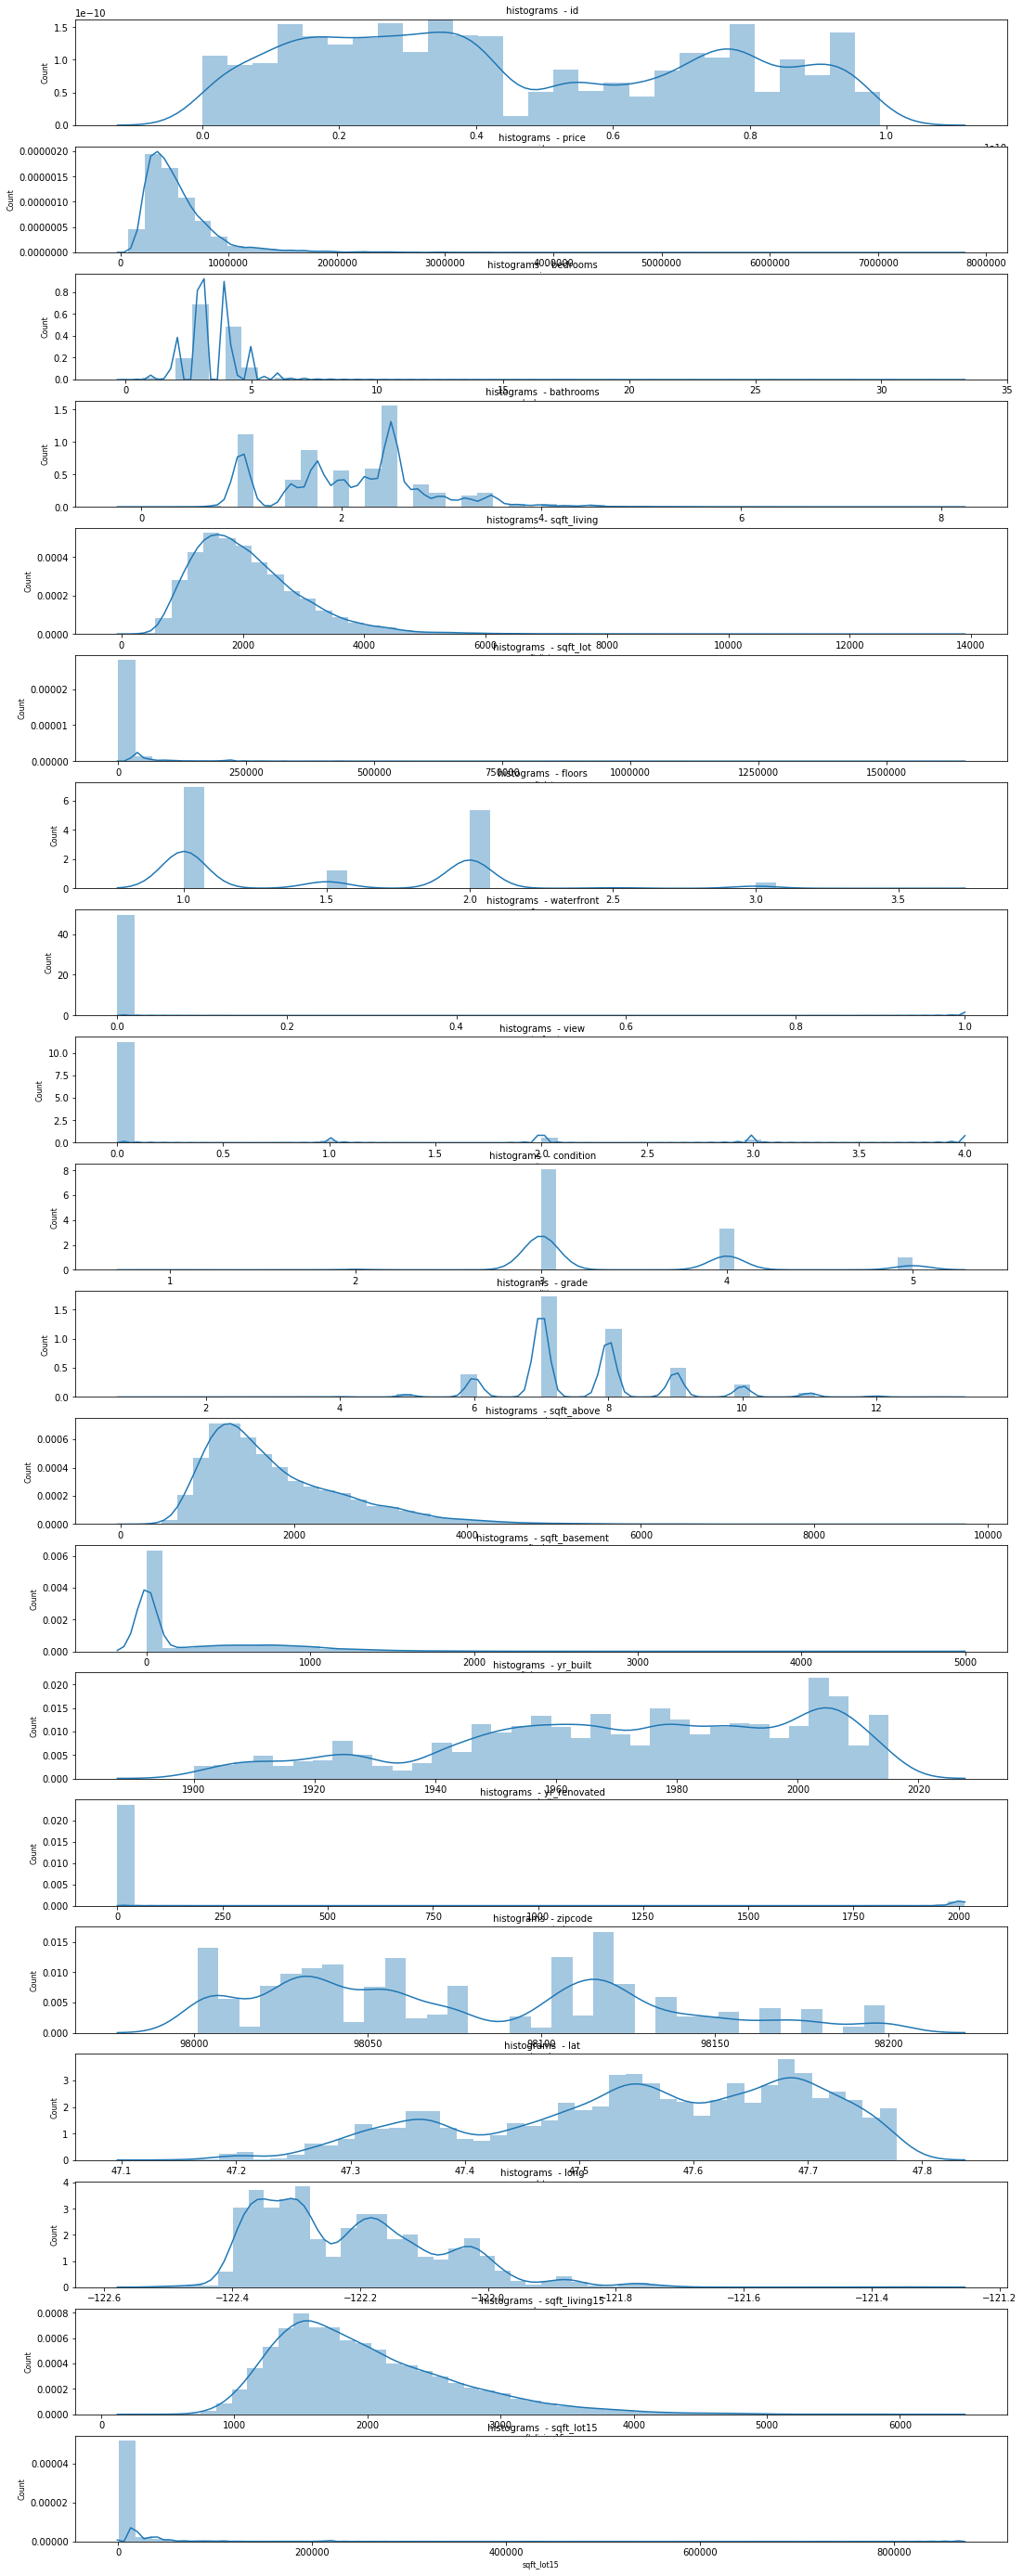

In [14]:
col_names = df.columns

fig, ax = plt.subplots(len(col_names), figsize=(18,50))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title(' histograms  - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

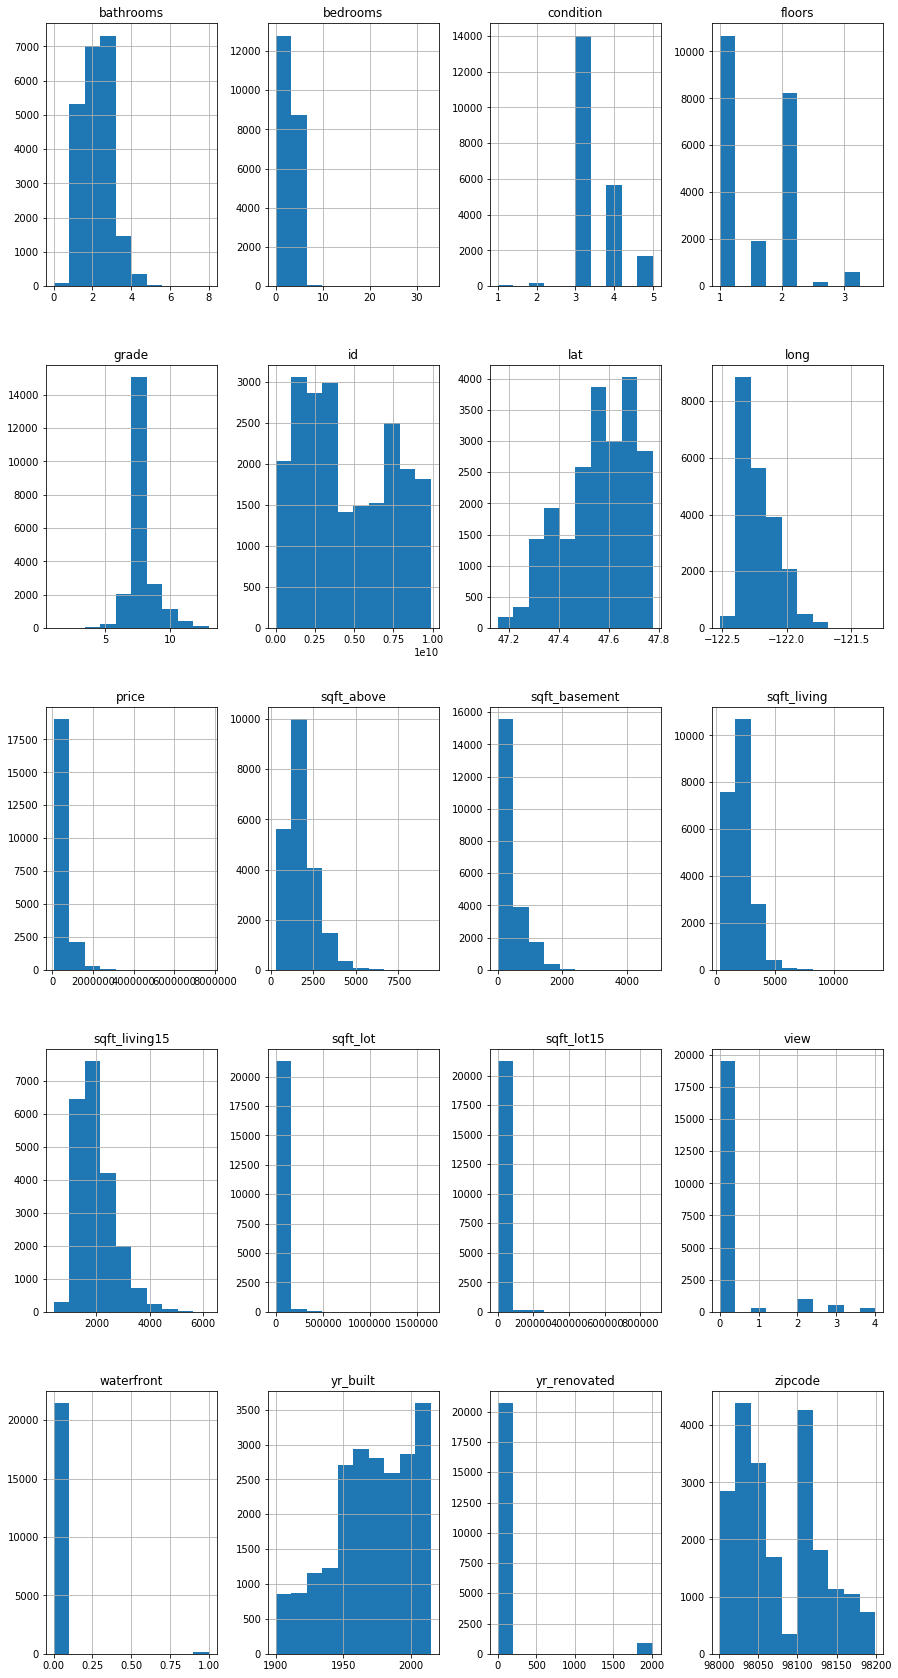

In [16]:
from matplotlib import pyplot
names = df.columns
df.hist(figsize=(15,30))

pyplot.show()

##Bivariate Analysis

Text(0.5, 1.0, 'price vs number of bedrooms')

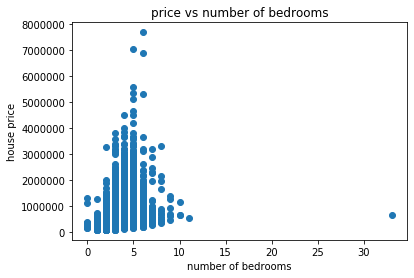

In [17]:
#plot price vs the number of bedroom
plt.scatter(df["bedrooms"],df["price"])
plt.ylabel("house price")
plt.xlabel("number of bedrooms")
plt.title("price vs number of bedrooms")

Text(0.5, 1.0, 'price vs condition of the house')

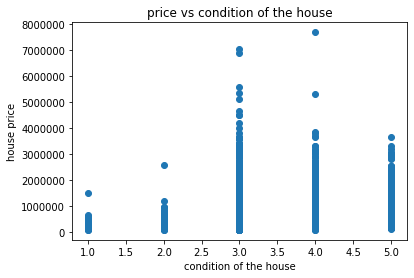

In [18]:
plt.scatter(df["condition"],df["price"])
plt.ylabel("house price")
plt.xlabel("condition of the house")
plt.title("price vs condition of the house")

Text(0.5, 1.0, 'price vs bathrooms')

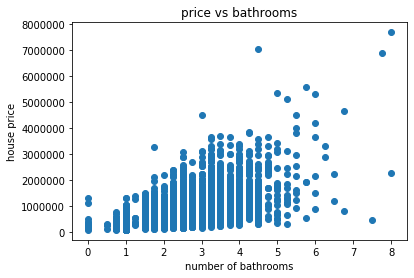

In [19]:
plt.scatter(df["bathrooms"],df["price"])
plt.ylabel("house price")
plt.xlabel("number of bathrooms")
plt.title("price vs bathrooms")

Text(0.5, 1.0, 'price vs sqft_living')

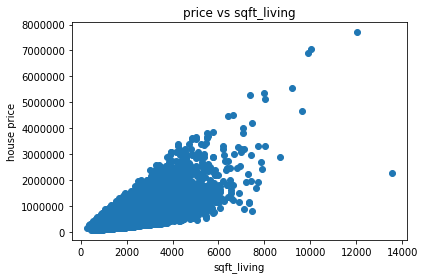

In [20]:
plt.scatter(df["sqft_living"],df["price"])
plt.ylabel("house price")
plt.xlabel("sqft_living")
plt.title("price vs sqft_living")

Text(0.5, 1.0, 'price vs view')

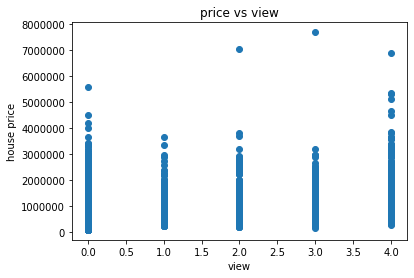

In [21]:
plt.scatter(df["view"],df["price"])
plt.ylabel("house price")
plt.xlabel("view")
plt.title("price vs view")

Text(0.5, 1.0, 'price vs floors')

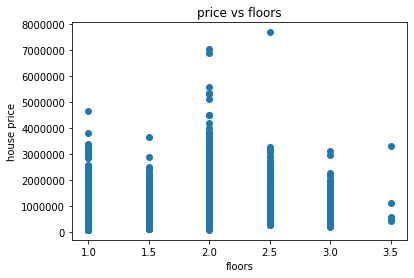

In [22]:
plt.scatter(df["floors"],df["price"])
plt.ylabel("house price")
plt.xlabel("floors")
plt.title("price vs floors")

Text(0.5, 1.0, 'price vs waterfront')

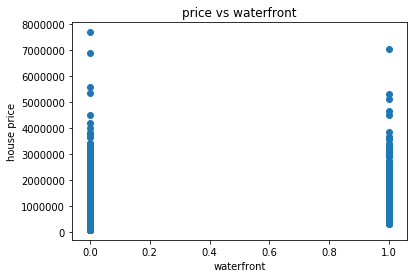

In [23]:
plt.scatter(df["waterfront"],df["price"])
plt.ylabel("house price")
plt.xlabel("waterfront")
plt.title("price vs waterfront")

Text(0.5, 1.0, 'price vs sqft_living15')

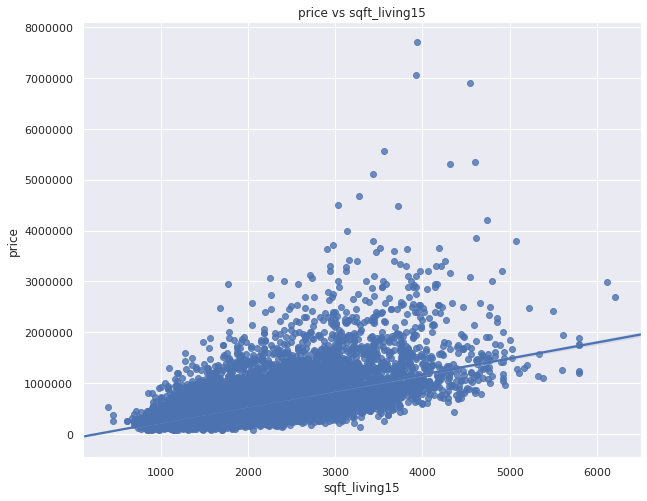

In [24]:
sns.set(rc={"figure.figsize":(10,8)})
sns.regplot(x=df["sqft_living15"],y=df["price"],fit_reg=True)
plt.title("price vs sqft_living15")

Text(0.5, 1.0, 'price vs sqft_living15')

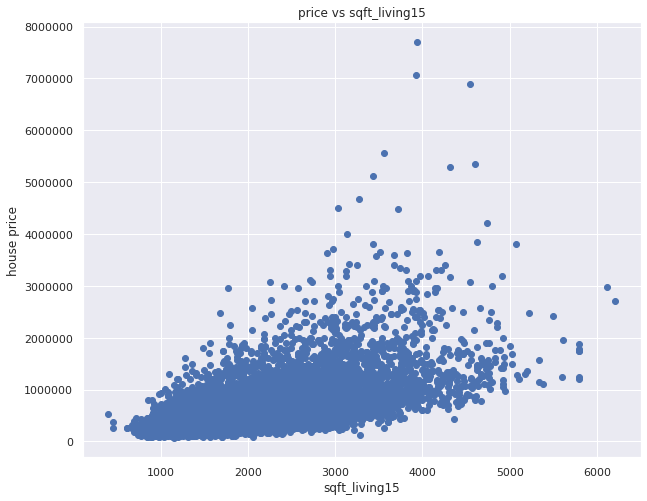

In [25]:
plt.scatter(df["sqft_living15"],df["price"])
plt.ylabel("house price")
plt.xlabel("sqft_living15")
plt.title("price vs sqft_living15")

Text(0.5, 1.0, 'price vs ssqft_basement')

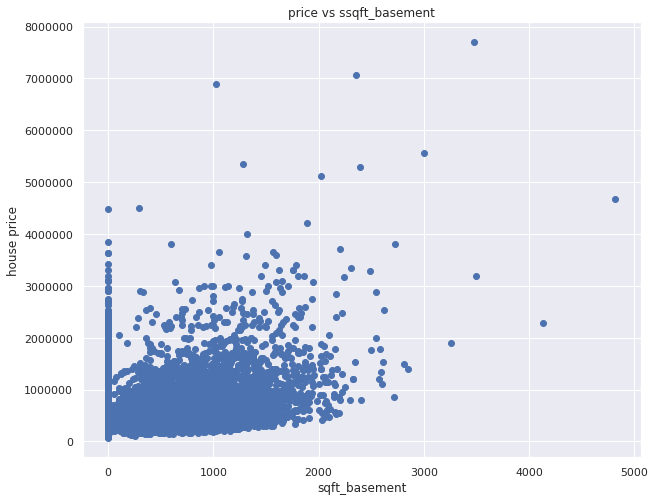

In [26]:
plt.scatter(df["sqft_basement"],df["price"])
plt.ylabel("house price")
plt.xlabel("sqft_basement")
plt.title("price vs ssqft_basement")

Text(0.5, 1.0, 'price vs yr_built')

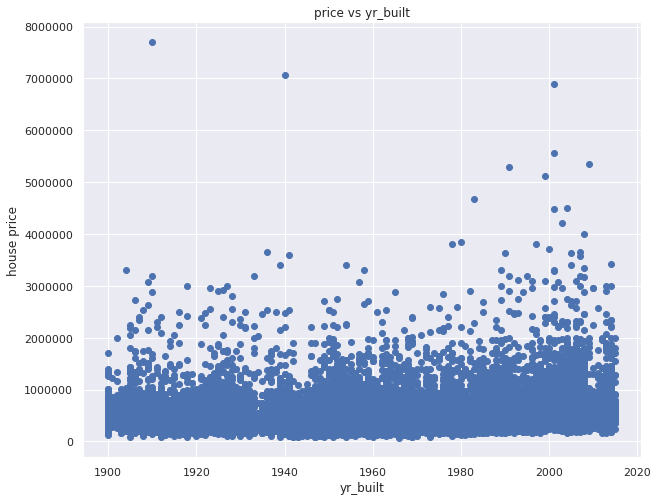

In [27]:
plt.scatter(df["yr_built"],df["price"])
plt.ylabel("house price")
plt.xlabel("yr_built")
plt.title("price vs yr_built")

Text(0.5, 1.0, 'price vs yr_renovated')

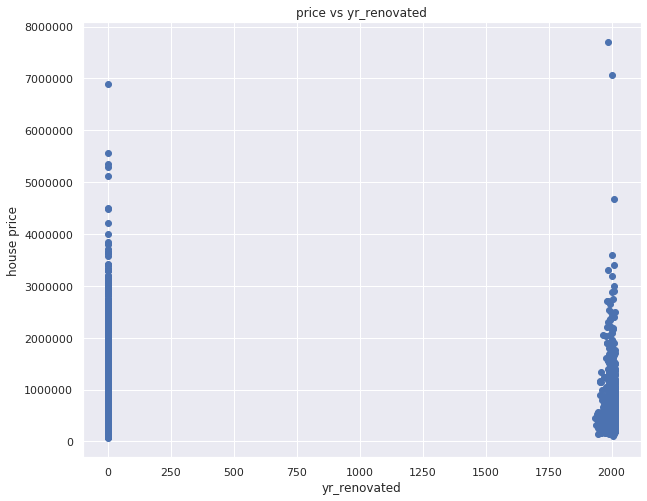

In [28]:
plt.scatter(df["yr_renovated"],df["price"])
plt.ylabel("house price")
plt.xlabel("yr_renovated")
plt.title("price vs yr_renovated")

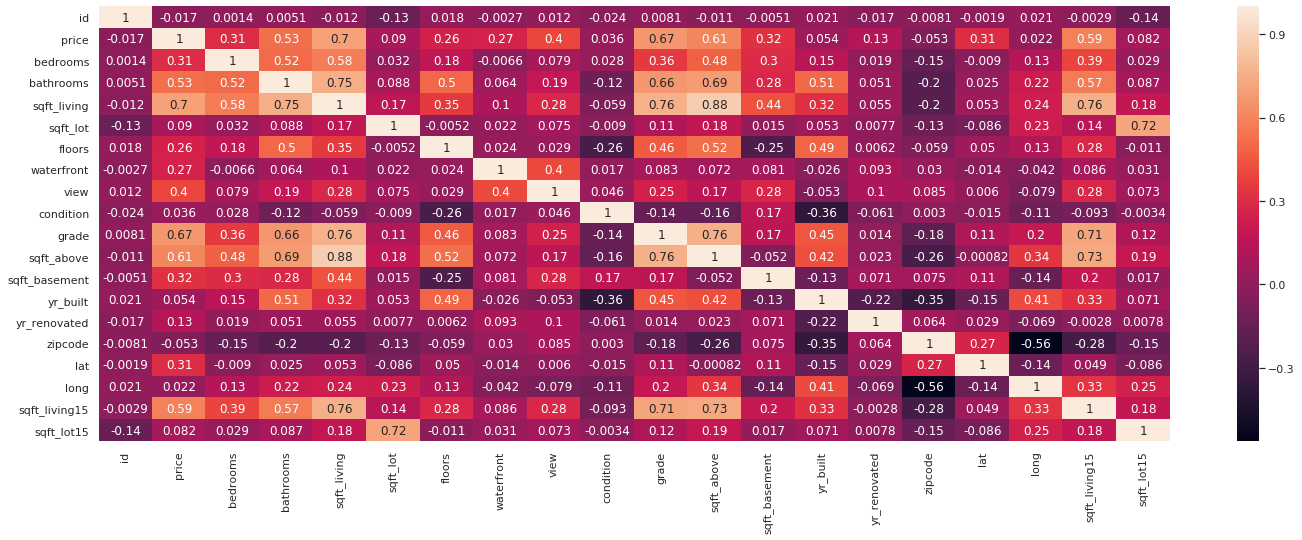

In [29]:
plt.figure(figsize=(24, 8))

vg_corr = df.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

There is a strong relationship of 0.76 between sqft_living15 and sqft_living
A strong relationship of 0.72 also exists between  sqft_lot and sqft_loft15

Hence,they will be peforming the same task when we build a model
We can therefore remove one of them 

#Dropping columns 
I went ahead and dropped columns that i shall not use based on my EDA analysis

In [30]:
houses = df.drop(["id","zipcode","lat","long","sqft_living","sqft_lot","sqft_above"],axis=1)
houses.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.000,3,1.000,1.000,0,0,3,7,0,1955,0,1340,5650
1,538000.000,3,2.250,2.000,0,0,3,7,400,1951,1991,1690,7639
2,180000.000,2,1.000,1.000,0,0,3,6,0,1933,0,2720,8062
3,604000.000,4,3.000,1.000,0,0,5,7,910,1965,0,1360,5000
4,510000.000,3,2.000,1.000,0,0,3,8,0,1987,0,1800,7503


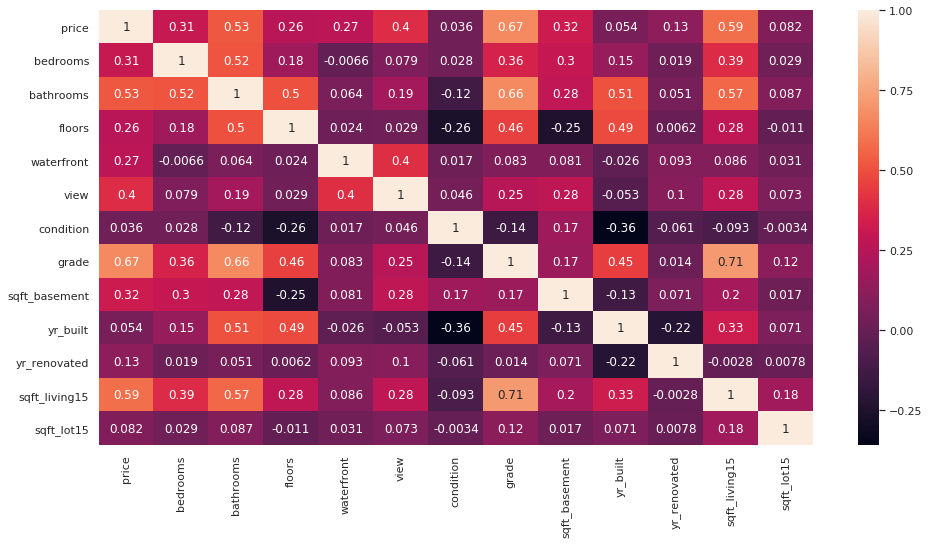

In [31]:
plt.figure(figsize=(16, 8))

vg_corr = houses.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

#Regression

##Multiple Linear Regression
We shall conduct PCA which shall do the reduction for the independent variables 


In [0]:
#Preprocessing 
#create the indepent variables 
X = houses.drop('price', 1)
y = np.log(houses['price'])

#Split the data
# 20% is for testing which 80% is for training the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [0]:
# Normalization
# PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Perform pca 
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [95]:
regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

13.048491205434638
[ 0.18317317  0.1231044  -0.00201386 -0.01786665]


In [97]:
#conduct the explained variance ratio
#It has the amount of variance explained by each of the selected components. 
#The higher the variance is the more information the component would carry
pca.explained_variance_ratio_

array([0.28476031, 0.15608207, 0.10645414, 0.08723796])

In [0]:
y_pred = regressor.predict(X_test)

In [99]:
#check how accurate our model will be 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2972132406076568
Mean Squared Error: 0.13392016002746743
Root Mean Squared Error: 0.3659510350135212


For Multiple linear regression to incorporated,we have to ensure we meet 4 conditions
1. No or low multicollinearity
2.Homoscedasticity
3.Normality
4.Independent variables should be independent

###Test for Multicollinearty

In [101]:
correlations = houses.corr()
correlations

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000,0.308,0.525,0.257,0.266,0.397,0.036,0.667,0.324,0.054,0.127,0.585,0.082
bedrooms,0.308,1.000,0.516,0.175,-0.007,0.079,0.028,0.357,0.303,0.154,0.019,0.392,0.029
bathrooms,0.525,0.516,1.000,0.501,0.064,0.188,-0.125,0.665,0.284,0.506,0.051,0.569,0.087
floors,0.257,0.175,0.501,1.000,0.024,0.029,-0.264,0.458,-0.246,0.489,0.006,0.280,-0.011
waterfront,0.266,-0.007,0.064,0.024,1.000,0.402,0.017,0.083,0.081,-0.026,0.093,0.086,0.031
view,0.397,0.079,0.188,0.029,0.402,1.000,0.046,0.251,0.277,-0.053,0.103,0.280,0.073
condition,0.036,0.028,-0.125,-0.264,0.017,0.046,1.000,-0.145,0.174,-0.361,-0.061,-0.093,-0.003
grade,0.667,0.357,0.665,0.458,0.083,0.251,-0.145,1.000,0.168,0.447,0.014,0.713,0.119
sqft_basement,0.324,0.303,0.284,-0.246,0.081,0.277,0.174,0.168,1.000,-0.133,0.071,0.200,0.017
yr_built,0.054,0.154,0.506,0.489,-0.026,-0.053,-0.361,0.447,-0.133,1.000,-0.225,0.326,0.071


Dataframe with inverse of the correlation

In [102]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,2.677,0.088,-0.511,-0.193,-0.386,-0.234,-0.086,-1.326,-0.259,0.835,-0.035,-0.447,0.033
bedrooms,0.088,1.485,-0.709,-0.016,0.029,0.118,-0.062,0.011,-0.227,0.184,0.035,-0.298,0.045
bathrooms,-0.511,-0.709,3.115,-0.757,0.056,0.016,-0.111,-0.424,-0.672,-0.984,-0.257,-0.237,-0.043
floors,-0.193,-0.016,-0.757,1.905,0.013,-0.040,0.141,-0.364,0.706,-0.331,-0.057,0.244,0.117
waterfront,-0.386,0.029,0.056,0.013,1.256,-0.458,-0.002,0.207,0.065,-0.135,-0.062,0.085,-0.010
view,-0.234,0.118,0.016,-0.040,-0.458,1.423,-0.000,-0.056,-0.261,0.124,-0.031,-0.208,-0.034
condition,-0.086,-0.062,-0.111,0.141,-0.002,-0.000,1.224,0.037,-0.073,0.443,0.196,0.061,-0.023
grade,-1.326,0.011,-0.424,-0.364,0.207,-0.056,0.037,3.433,0.001,-0.703,-0.030,-1.100,-0.018
sqft_basement,-0.259,-0.227,-0.672,0.706,0.065,-0.261,-0.073,0.001,1.601,0.186,0.011,0.095,0.053
yr_built,0.835,0.184,-0.984,-0.331,-0.135,0.124,0.443,-0.703,0.186,2.247,0.472,-0.149,-0.051


The VIF score for each variable is found alongside the downwards sloping diagonal
The VIF is < 5 therefore our variables are not highly correlated.We can work with it a it is

###Residual plots

In [103]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.0031520799814798565

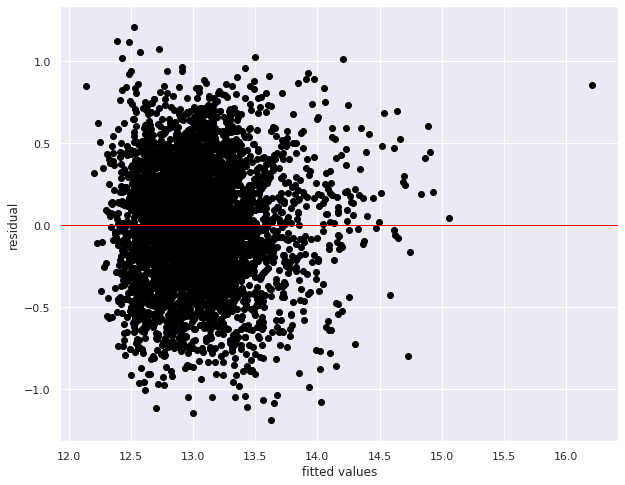

In [104]:
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

###Heteroscedasticity

In [105]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



4555.239227821876
the variances are homogeneous!


##Quantile Regression

In [0]:
#CREATE OUR FEATURES
X = houses.drop('price', 1)
y = np.log(houses['price'])

In [0]:
#perform a train and a test for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [134]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile

mod = smf.quantreg('y ~ X', houses)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4019
Model:                       QuantReg   Bandwidth:                     0.05415
Method:                 Least Squares   Sparsity:                       0.7947
Date:                Mon, 27 Jan 2020   No. Observations:                21610
Time:                        07:55:09   Df Residuals:                    21597
                                        Df Model:                           12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5151      0.254     88.624      0.000      22.017      23.013
X[0]          -0.0113      0.004     -3.203      0.001      -0.018      -0.004
X[1]           0.1014      0.006     16.629      0.000       0.089       0.113
X[2]           0.1438      0.007     20.892      0.0

##Ridge Regression

In [0]:
#create the features 
X = houses.drop('price', 1)
y = np.log(houses['price'])

In [0]:
#perform a train and a test for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [0]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [122]:
#determine the strength of the model using best params and best score
search.fit(X_train,y_train)
search.best_params_
#{'alpha': 0.001}
abs(search.best_score_) 


0.09749792650774282

The params has choosen its alpha as 0.001 for this model

In [123]:
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

0.09730339599835515


In [128]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,houses.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.

{'bathrooms': 0.13089477424389215,
 'bedrooms': 0.10813192476836779,
 'condition': 0.22921399997037809,
 'floors': 0.3792708934441483,
 'grade': 0.00012656079966319312,
 'price': -0.0035988591518937916,
 'sqft_basement': -0.005617143429971232,
 'sqft_living15': -8.05843697973799e-08,
 'view': 0.04418823561941152,
 'waterfront': 0.04071396151790691,
 'yr_built': 1.4271486164636045e-05,
 'yr_renovated': 0.00015070606329588718}

##Lasso Regression

In [0]:
#create the features 
X = houses.drop('price', 1)
y = np.log(houses['price'])

In [0]:
# Scaling data 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [58]:
# Creating lasso object
lasso = linear_model.Lasso() 

# Fitting the models
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.0
lasso MSE: 0.277561826009499
lasso coef: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [66]:
#Splitting the data into training and test sets and choose your parameters with GridSearch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.49046469822962135
linear score: 0.6509897318902746
lasso MSE: 0.14134244016179714
linear MSE: 0.09681363148883866
lasso best estimator coef: [ 0.          0.00262109  0.          0.          0.00343474  0.
  0.2180661   0.01471157 -0.          0.          0.065524    0.        ]
linear coef: [-0.00677518  0.07886334  0.07377565  0.03162683  0.028176    0.02571015
  0.26703154  0.06150075 -0.16555921  0.00616455  0.10709217 -0.0014341 ]


A model with the highest R-squared score will give us the best parameters.

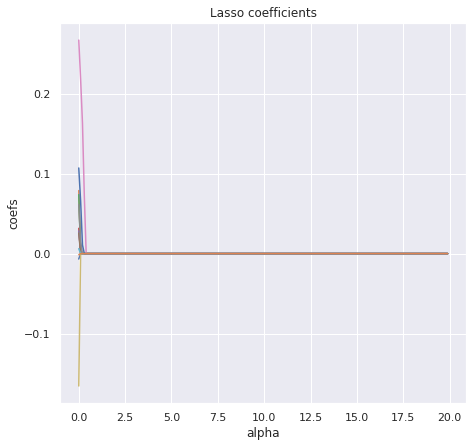

In [67]:

coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

##Elastic Net Regression